In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 1. Análisis y Creación del Conjunto de Datos ---
data = {'ID': [1, 2, 3, 4],
        'Antigüedad (años)': [5, 3, 7, 2],
        'Kilometraje (km)': [50000, 30000, 70000, 25000],
        'Puertas': [4, 2, 4, 2],
        'Precio (USD)': [12000, 15000, 9000, 16000]}
df = pd.DataFrame(data).set_index('ID')

In [11]:
# --- 2. Creación del Modelo: Definición de Variables ---
# Se definen las variables predictoras (X) y la variable objetivo (y)
features = ['Antigüedad (años)', 'Kilometraje (km)', 'Puertas']
X = df[features]
y = df['Precio (USD)']

# --- 3. División de los Datos en Entrenamiento y Prueba ---
# Se dividen los datos: 75% para entrenamiento y 25% para prueba (3 y 1 filas)
# random_state asegura que la división sea siempre la misma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# --- 4. Entrenamiento del Modelo y Predicciones ---
# Se crea una instancia del modelo de Regresión Lineal
model = LinearRegression()
# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)
# Se realizan las predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [14]:
# --- 5. Cálculo de Métricas de Desempeño ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# --- 6. Impresión de Resultados ---
print("--- Resultados del Modelo de Regresión Lineal ---")
print(f"Precio Real (Test): {y_test.values} USD")
print(f"Precio Predicho (Test): {np.round(y_pred,2)} USD")
print("\n--- Métricas de Desempeño ---")
print(f"MAE (Error Absoluto Medio): {mae:.2f} USD")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f} USD")
print(f"R² (Coeficiente de Determinación): {r2:.2f}")

--- Resultados del Modelo de Regresión Lineal ---
Precio Real (Test): [15000 16000] USD
Precio Predicho (Test): [15000. 15750.] USD

--- Métricas de Desempeño ---
MAE (Error Absoluto Medio): 125.00 USD
MSE (Error Cuadrático Medio): 31250.00
RMSE (Raíz del Error Cuadrático Medio): 176.78 USD
R² (Coeficiente de Determinación): 0.88


<Figure size 800x600 with 0 Axes>

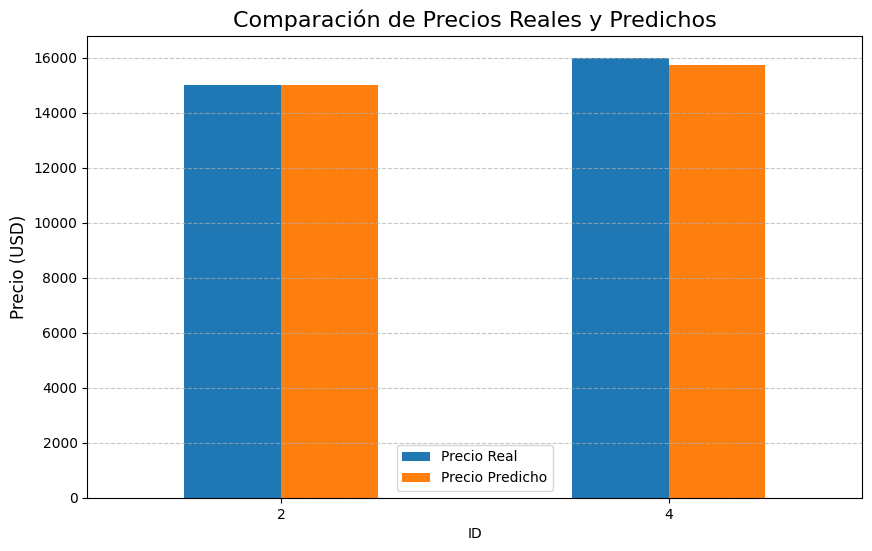

In [15]:
# --- 9. Gráfico Comparativo ---
plt.figure(figsize=(8, 6))
# Se crea un DataFrame para facilitar la visualización
resultados = pd.DataFrame({'Precio Real': y_test, 'Precio Predicho': y_pred})
resultados.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Precios Reales y Predichos', fontsize=16)
plt.ylabel('Precio (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
resultados

,Precio Real,Precio Predicho
ID,,
2,15000,15000.000000
4,16000,15750.000007
